In [10]:
# Importing necessary libraries
import pandas as pd

# Loading the car1_speed.csv file
car1_speed_data = pd.read_csv('car1_speed.csv')

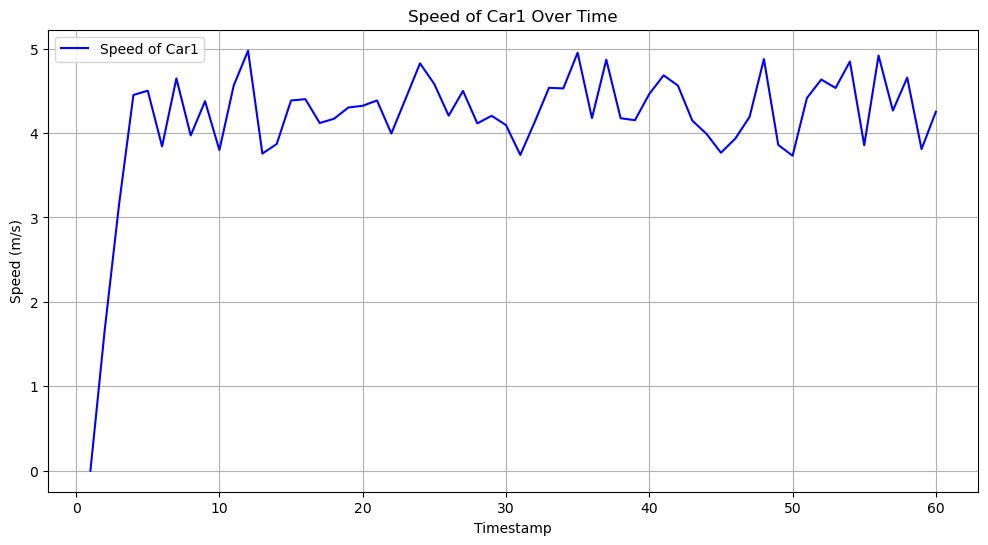

In [11]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Plotting the speed of car1 over time
plt.figure(figsize=(12, 6))
plt.plot(car1_speed_data['Timestamp'], car1_speed_data['Speed'], label='Speed of Car1', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Speed (m/s)')
plt.title('Speed of Car1 Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

with open('message_exchange.csv', 'r') as f:
    lines = f.read().splitlines()

data = []

for line in lines[1:]:  # Skip the first line
    fields = line.split(',')
    carId = fields[0]
    rsuId = fields[1]
    messageCount = int(fields[2])
    timestamps = list(map(int, fields[3:]))
    data.append([carId, rsuId, messageCount, timestamps])

df = pd.DataFrame(data, columns=['CarId', 'RSUId', 'MessageCount', 'Timestamps'])

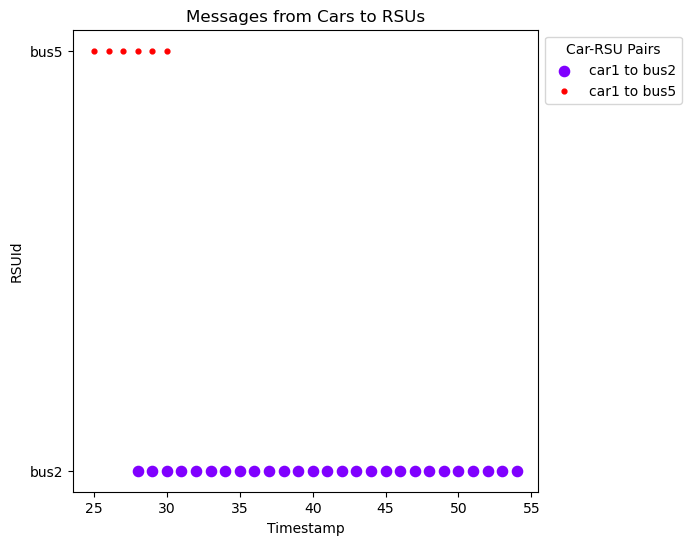

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a color map to assign a unique color to each car-RSU pair
colors = cm.rainbow(np.linspace(0, 1, len(df)))

plt.figure(figsize=(6, 6))

for color, (_, row) in zip(colors, df.iterrows()):
    carId = row['CarId']
    rsuId = row['RSUId']
    timestamps = row['Timestamps']
    messageCount = row['MessageCount']

    # Create a scatter plot with one point for each timestamp
    plt.scatter(timestamps, [rsuId]*len(timestamps), s=messageCount*2, color=color, label=f'{carId} to {rsuId}')
    
plt.title('Messages from Cars to RSUs')
plt.xlabel('Timestamp')
plt.ylabel('RSUId')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Car-RSU Pairs')
plt.show()